In [1]:
import pandas as pd
import numpy as np
XXX = pd.read_csv("c.csv")
XXX.set_index('name')
XXX

,id,name,fullName,password,idProfile,isResource,idTeam,idRole,isContact,initials,...,crypto,cookieHash,passwordChangeDate,apiKey,profile,profileCode,role,role_descrip,team,idResource
0,1,Resource 1,Resource 1,12345,1,0,0,0,0,NaN,...,sha256,NaN,2020-08-11 00:00:00,dd740454184b5f2aa2c21c293853cfeb,profileAdministrator,ADM,NaN,NaN,NaN,NaN
1,2,Resource 2,Resource 2,12345,5,0,0,0,0,NaN,...,NaN,NaN,2018-02-19 00:00:00,a758923aa8beca9b472422f815864ddd,profileGuest,G,NaN,NaN,NaN,NaN
2,3,Resource 3,Resource 3,12345,3,1,0,0,1,BK,...,sha256,NaN,2018-04-24 00:00:00,84308598f76cdf395e681cfac2d21140,profileProjectLeader,PL,NaN,NaN,NaN,NaN
3,4,Resource 4,Resource 4,12345,1,1,1,1,1,AM,...,sha256,NaN,2020-06-05 00:00:00,5c6637f47a8f347ebb8c52d27630f6ac,profileAdministrator,ADM,Manager,Leader/Manager of the project,Abacus Team,7.0
4,5,Resource 5,Resource 5,12345,1,1,0,0,1,EM,...,sha256,NaN,2020-07-09 00:00:00,d8b3c8a98f4ee4c6469dbd9e46579883,profileAdministrator,ADM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,Resource 59,Resource 59,12345,4,1,0,0,1,SA,...,sha256,d6f097755e0321899cbc4341e72f5217,2020-07-13 00:00:00,99ec235c26e8d7255c178eee0030647b,profileTeamMember,TM,NaN,NaN,NaN,NaN
59,60,Resource 60,Resource 60,12345,5,1,0,0,1,HZ,...,sha256,NaN,NaN,0c6e0c658972fc918749a1a8061e73cd,profileGuest,G,NaN,NaN,NaN,NaN
60,61,Resource 61,Resource 61,12345,2,0,0,0,0,HBH,...,sha256,c4c1e94633be80426c79eada4f565d40,2020-10-22 00:00:00,81b896f1e83961bb44e5750f42e612cd,profileSupervisor,SUP,NaN,NaN,NaN,NaN
61,62,Resource 62,Resource 62,12345,4,1,0,0,1,AA,...,sha256,625151a0afd2b01256a8fb71a350edeb,2020-11-23 00:00:00,5dd7ef0c6bbfc4ce9bc2e5344cac11c4,profileTeamMember,TM,NaN,NaN,NaN,NaN


In [2]:
XX =  XXX[['idProfile','idTeam','idRole']]
data_decathlon = XX.replace(np.nan,0)
data_decathlon

,idProfile,idTeam,idRole
0,1,0,0
1,5,0,0
2,3,0,0
3,1,1,1
4,1,0,0
...,...,...,...
58,4,0,0
59,5,0,0
60,2,0,0
61,4,0,0


In [5]:
data_decathlon.shape

(63, 3)

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
pca = PCA(n_components=3)
new=data_decathlon.iloc[:,[0,1,2]]
print(new)

In [7]:
#The first axis explains the most of the variance(we have 4 principal axes )
print(pca.fit(new))
pca.explained_variance_ratio_

PCA(n_components=3)


array([0.73147097, 0.25198559, 0.01654344])

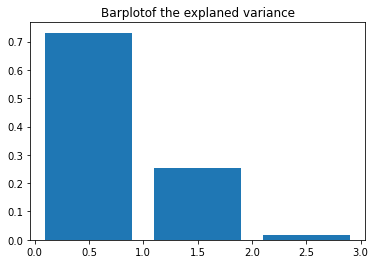

In [9]:
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Barplotof the explaned variance");

In [44]:
X_reduced = pca.transform(new)
plt.figure(figsize=(18,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

for label, x, y in zip(new.index, X_reduced[:, 0], X_reduced[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.title("ACP approximating similar evolution patterns");

Error in callback <function flush_figures at 0x00000162F30A3C10> (for post_execute):


KeyboardInterrupt: 

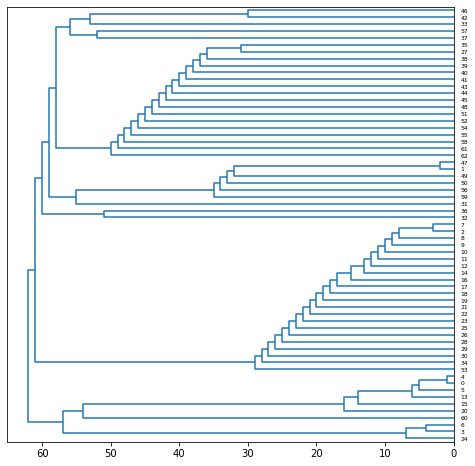

In [56]:
#Hierarchical ascending classification
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(new)
dendro = [ ]
for a,b in ward.children_:
    dendro.append([a,b,float(len(dendro)+1),len(dendro)+1])

from scipy.cluster.hierarchy import dendrogram
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1,1,1)

r = dendrogram(dendro, color_threshold=1, labels=new.index, show_leaf_counts=True, ax=ax, orientation = "left")


In [72]:
def plotly_global_timeseries():
    from sklearn.cluster import AgglomerativeClustering
    ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(new)
    dendro = [ ]
    for a,b in ward.children_:
        dendro.append([a,b,float(len(dendro)+1),len(dendro)+1])

    from scipy.cluster.hierarchy import dendrogram
    fig = plt.figure( figsize=(8,8) )
    ax = fig.add_subplot(1,1,1)

    r = dendrogram(dendro, color_threshold=1, labels=new.index, show_leaf_counts=True, ax=ax, orientation = "left")
    plt.savefig('books_read.png')
    import base64

    with open("books_read.png", "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())


    return encoded_string.decode('utf-8')


In [73]:
import flask

import pickle

# Use pickle to load in the pre-trained model.


app = flask.Flask(__name__, template_folder='templates')

@app.route('/aa', methods=['GET', 'POST'])

def main():

    if flask.request.method == 'GET':
       
        prediction = plotly_global_timeseries()

        return flask.render_template('main.html',

                                     result=prediction,)

if __name__ == '__main__':

    from werkzeug.serving import run_simple
    run_simple('localhost', 8000, app)

 * Running on http://localhost:8000/ (Press CTRL+C to quit)
127.0.0.1 - - [14/May/2021 23:36:29] "GET /aa HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2021 23:41:46] "GET /aa HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2021 23:43:06] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [14/May/2021 23:43:10] "GET /bb HTTP/1.1" 404 -
127.0.0.1 - - [14/May/2021 23:43:14] "GET /aa HTTP/1.1" 200 -


Error in callback <function flush_figures at 0x00000162F30A3C10> (for post_execute):


KeyboardInterrupt: 